# Visualizing Earnings Based On College Majors

## Introduction

In this project we aim to answer the following questions by using data visualization tools of Pandas and Matplotlib: 

* Do students in more popular majors make more money?
 - Using scatter plots
* How many majors are predominantly male? Predominantly female?
 - Using histograms
* Which category of majors have the most students?
 - Using bar plots
 
The data is originally released by [American Community Survey](https://www.census.gov/programs-surveys/acs/Z) for years 2010-2012 and was cleaned by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Each row in the dataset represent a different major in college and contains some fo the following columns: 
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
# Import Libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
recent_grads = pd.read_csv('recent-grads.csv')
# First row
print(recent_grads.iloc[0])
print('\n')
# Display first and last five rows
print(recent_grads.head())
print('\n')
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


   Rank  

In [7]:
# Summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [12]:
# Drop missing values
raw_data_count = recent_grads.count(axis=1)
print(raw_data_count)

0      21
1      21
2      21
3      21
4      21
       ..
168    21
169    21
170    21
171    21
172    21
Length: 173, dtype: int64


In [14]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.count(axis=1)
print(cleaned_data_count)

0      21
1      21
2      21
3      21
4      21
       ..
168    21
169    21
170    21
171    21
172    21
Length: 172, dtype: int64


We have dropped one row that contains missing values. 

## Pandas, Scatter Plots

Text(0.5, 1.0, 'Median vs. Sample_size')

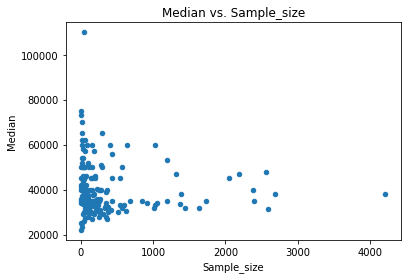

In [15]:
ax = recent_grads.plot(x='Sample_size',y='Median',kind='scatter')
ax.set_title('Median vs. Sample_size')

Text(0.5, 1.0, 'Unemployment_rate vs. Sample_size')

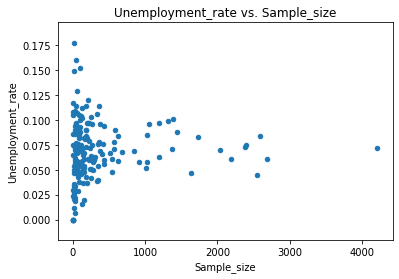

In [16]:
ax = recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter')
ax.set_title('Unemployment_rate vs. Sample_size')

Text(0.5, 1.0, 'Median vs. Full_time')

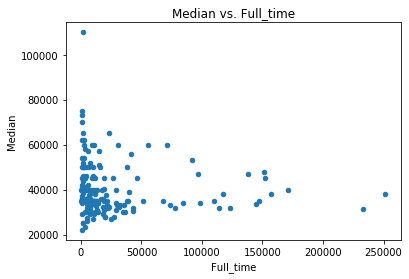

In [17]:
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax.set_title('Median vs. Full_time')

Text(0.5, 1.0, 'Unemployment_rate vs. ShareWomen')

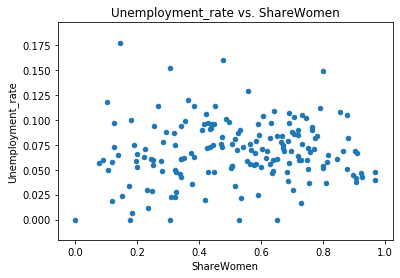

In [20]:
ax = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')
ax.set_title('Unemployment_rate vs. ShareWomen')

Text(0.5, 1.0, 'Median vs. Men')

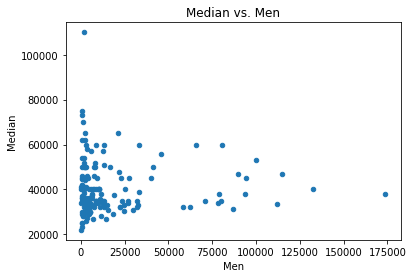

In [21]:
ax = recent_grads.plot(x='Men',y='Median',kind='scatter')
ax.set_title('Median vs. Men')

Text(0.5, 1.0, 'Median vs. Women')

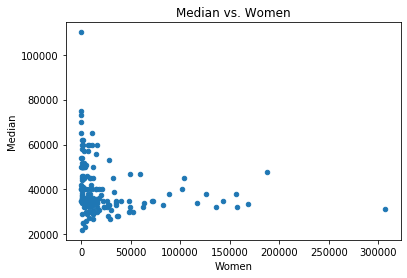

In [22]:
ax = recent_grads.plot(x='Women',y='Median',kind='scatter')
ax.set_title('Median vs. Women')

We make the following observation:
* Student in popular majors doesn't always make more money. Majority of the high income majors have a small sample size. 
* Major in subjects that are majority female see a trend of lower income than the subjects that are majortiy male.
* More full-time employees doen't correlate to median salary. In contrast, some majors who has a small size of full time employees show a higher median salary.

## Pandas, Histograms

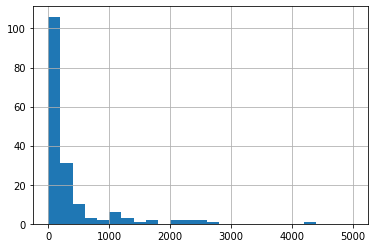

In [55]:
recent_grads['Sample_size'].hist(bins=25,range=(0,5000))

(21911.999, 30800.0]    24
(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(74800.0, 83600.0]       1
(83600.0, 92400.0]       0
(92400.0, 101200.0]      0
(101200.0, 110000.0]     1
Name: Median, dtype: int64

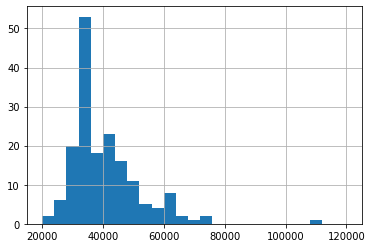

In [65]:
recent_grads['Median'].hist(bins=25,range=(20000,120000))
recent_grads['Median'].value_counts(bins=10).sort_index()

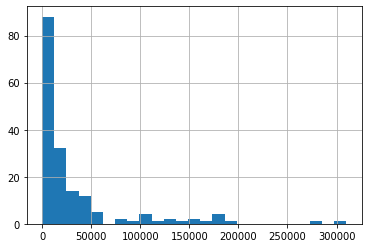

In [57]:
recent_grads['Employed'].hist(bins=25,range=(0,310000))

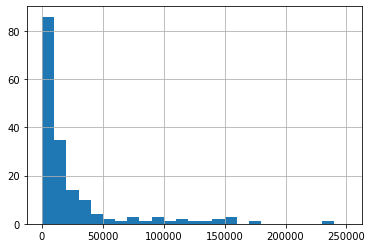

In [58]:
recent_grads['Full_time'].hist(bins=25,range=(100,250000))

(-0.0019690000000000003, 0.0969]     3
(0.0969, 0.194]                     14
(0.194, 0.291]                      16
(0.291, 0.388]                      22
(0.388, 0.484]                      19
(0.484, 0.581]                      21
(0.581, 0.678]                      25
(0.678, 0.775]                      29
(0.775, 0.872]                      11
(0.872, 0.969]                      12
Name: ShareWomen, dtype: int64

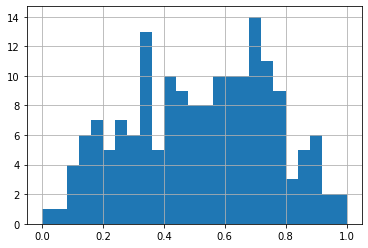

In [63]:
recent_grads['ShareWomen'].hist(bins=25,range=(0,1))
recent_grads['ShareWomen'].value_counts(bins=10).sort_index()

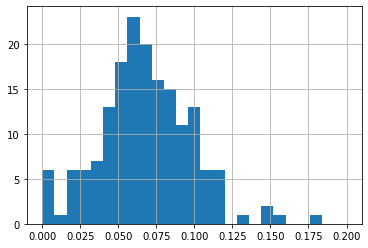

In [60]:
recent_grads['Unemployment_rate'].hist(bins=25,range=(0,0.2))

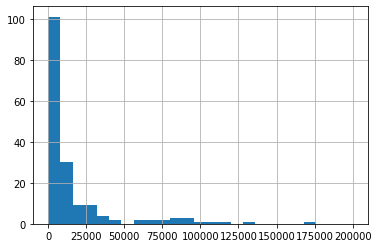

In [61]:
recent_grads['Men'].hist(bins=25,range=(100,200000))

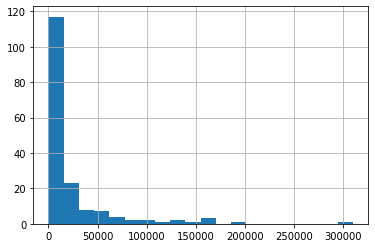

In [62]:
recent_grads['Women'].hist(bins=20,range=(0,310000))

We arrive at the following conclusions: 
* around 56% of the majors are predominantly female, and around 44% of the majors are predominantly male. 
* The most common median salary is around $30,000-40,000

## Pandas, Bar Plots

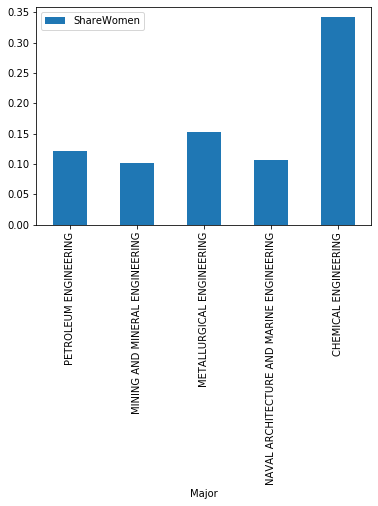

In [73]:
recent_grads[:5].plot.bar(x='Major',y='ShareWomen')

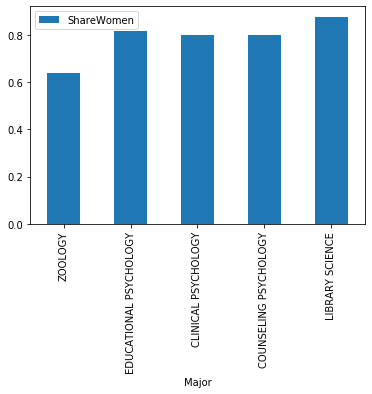

In [74]:
recent_grads[-5:].plot.bar(x='Major',y='ShareWomen')

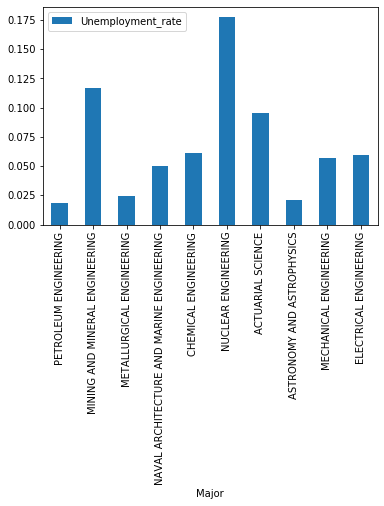

In [75]:
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate')

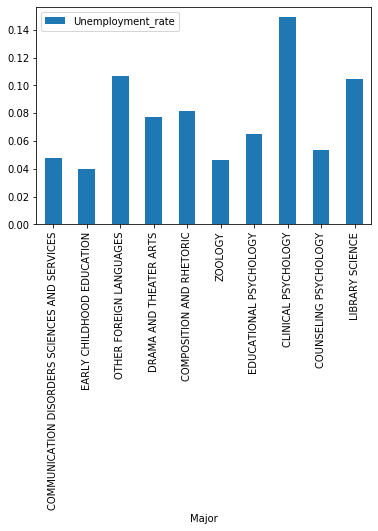

In [76]:
recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate')